In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib


# Paso 1: Entendimiento del Negocio

# Paso 2: Entendimiento de los Datos

## Entendiemiento del Dataset de Calificaciones de estudiantes

En esta etapa, exploramos los datos disponibles para comprender su estructura, contenido y calidad.

Hemos obtenido un dataset con las siguientes columnas:

**Sede**= valor categorico del nombre de las sede del colegio
**Estudiante**= nombre completo del estudiante
**Documento de identidad**= docuemtno de identidad del estudiante
**Grado**= 
**Grupo**=
**Periodo**= 
**Año**= 
**Intensidad Horaria**= 
**Asignatura**= 
**Cognitiva**=
**Procedimental**= 
**Actitudinal**= 
**Axiologica**= 


Vamos a explorar los datos para entender mejor su estructura y calidad.

### Análisis Exploratorio de los Datos

- Cargar el archivo Excel

In [108]:

# Cargar el archivo Excel
url = 'C:/Users/Cathe/Documents/MAA/TERCER SEMESTRE/ELECTIVA I - AD/DATA FORMAR INNOVAR/Calificaciones-2023-2024.csv'
calificaciones_df = pd.read_csv(url)
calificaciones_df.head()


,Sede,Estudiante,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Naturales,100,96,96,NaN
1,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Sociales,100,96,96,NaN
2,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Matemáticas,100,100,98,NaN
3,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Lectoescritura,100,100,98,NaN
4,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Inglés,98,97,98,NaN


- Exploramos la estructura del DataFrame (nombre de columnas, tipos de datos y valores nulos)

In [109]:
# 
calificaciones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24944 entries, 0 to 24943
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sede                    24944 non-null  object 
 1   Estudiante              24944 non-null  object 
 2   Documento de identidad  24944 non-null  object 
 3   Grado                   24944 non-null  object 
 4   Grupo                   24944 non-null  object 
 5   Periodo                 24944 non-null  object 
 6   Año                     24944 non-null  int64  
 7   Intensidad Horaria      22045 non-null  float64
 8   Asignatura              24944 non-null  object 
 9   Cognitiva               24944 non-null  int64  
 10  Procedimental           24944 non-null  int64  
 11  Actitudinal             24944 non-null  int64  
 12  Axiologica              22045 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.5+ MB


- se verifica la cantidad de valores null

In [110]:
#se verifica la cantidad de valores null
calificaciones_df.isnull().sum()

Sede                         0
Estudiante                   0
Documento de identidad       0
Grado                        0
Grupo                        0
Periodo                      0
Año                          0
Intensidad Horaria        2899
Asignatura                   0
Cognitiva                    0
Procedimental                0
Actitudinal                  0
Axiologica                2899
dtype: int64

### Conversiones a Realizar
- **Columna `Estudiante`**: Convertida a tipo object y aplicado un hash para anonimizar.
- **Columnas `Documento de identidad`**: Eliminada
- **Valores nulos en columnas `Intensidad Horaria` y `Axiologica`**: se reemplaza null por 'NA' ya ue estos datos estan fantantes en los grados de preescolar


- Copiar df original para realizar las transformaciones iniciales de los datos

In [111]:
calificaciones_df_trans = calificaciones_df.copy()

# Función para aplicar hash a un valor
def hash_value(value):
    return hashlib.sha256(value.encode()).hexdigest()


- Se elimina filas de grados de preescolar ya que no poseen todas las calificaciones en todas las dimensiones

In [112]:
calificaciones_df_trans.loc[calificaciones_df_trans['Intensidad Horaria'].isnull()]

,Sede,Estudiante,Documento de identidad,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
0,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Naturales,100,96,96,NaN
1,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Pre Sociales,100,96,96,NaN
2,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Matemáticas,100,100,98,NaN
3,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Lectoescritura,100,100,98,NaN
4,Fusagasugá,Amelie Jiménez,Carrillo,Transición,A,III,2023,NaN,Inglés,98,97,98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24774,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Lectoescritura,98,90,95,NaN
24775,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Inglés,98,90,95,NaN
24776,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Aprendizaje Basado en Retos,96,96,96,NaN
24777,Fusagasugá,Salomé Bedoya,Ramírez,Jardín,A,II,2023,NaN,Educación Física,95,95,95,NaN


In [113]:
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Párvulos'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grupo'] == 'Prejardín'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Jardín'].index, inplace=True)
calificaciones_df_trans.drop(calificaciones_df_trans.loc[calificaciones_df_trans['Grado'] == 'Transición'].index, inplace=True)

- Cambiar columna Estudiante con valores hash

In [114]:
calificaciones_df_trans['Estudiante'] = calificaciones_df_trans['Estudiante'].apply(hash_value)

- eliminar columnas con datos sensibles

In [115]:
calificaciones_df_trans.drop(columns=['Documento de identidad'], inplace=True)

- cambiar columna Año por variable categorica

In [116]:
calificaciones_df_trans['Año'] = calificaciones_df_trans['Año'].astype('object')

- Se realiza imputacion de datos nulos de variables categoricas Intensidad Horaria y Axiologica con valor constante

In [117]:
#calificaciones_df_trans['Intensidad Horaria'].fillna(-1, inplace=True)
#calificaciones_df_trans['Axiologica'].fillna(-1, inplace=True)

## listar clases de las variables categoricas

In [118]:
calificaciones_df_trans['Sede'].value_counts() 

Sede
Fusagasugá    14369
Girardot       7676
Name: count, dtype: int64

In [119]:
calificaciones_df_trans['Grado'].value_counts()

Grado
6     2881
3     2755
5     2545
4     2539
2     2419
7     2389
1     2225
8     1440
10    1311
9     1214
11     327
Name: count, dtype: int64

In [120]:
calificaciones_df_trans['Grupo'].value_counts()

Grupo
A    21157
B      888
Name: count, dtype: int64

In [121]:
calificaciones_df_trans['Periodo'].value_counts()

Periodo
I      7405
II     7383
III    3633
IV     3624
Name: count, dtype: int64

In [122]:
calificaciones_df_trans['Año'].value_counts()

Año
2023    14631
2024     7414
Name: count, dtype: int64

In [123]:
#se verifica la cantidad de valores null
calificaciones_df_trans.isnull().sum()

Sede                  0
Estudiante            0
Grado                 0
Grupo                 0
Periodo               0
Año                   0
Intensidad Horaria    0
Asignatura            0
Cognitiva             0
Procedimental         0
Actitudinal           0
Axiologica            0
dtype: int64

In [124]:
calificaciones_df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22045 entries, 16 to 24943
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sede                22045 non-null  object 
 1   Estudiante          22045 non-null  object 
 2   Grado               22045 non-null  object 
 3   Grupo               22045 non-null  object 
 4   Periodo             22045 non-null  object 
 5   Año                 22045 non-null  object 
 6   Intensidad Horaria  22045 non-null  float64
 7   Asignatura          22045 non-null  object 
 8   Cognitiva           22045 non-null  int64  
 9   Procedimental       22045 non-null  int64  
 10  Actitudinal         22045 non-null  int64  
 11  Axiologica          22045 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [125]:

calificaciones_df_trans.head()

,Sede,Estudiante,Grado,Grupo,Periodo,Año,Intensidad Horaria,Asignatura,Cognitiva,Procedimental,Actitudinal,Axiologica
16,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,3.0,Ciencias Naturales,75,75,80,85.0
17,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,4.0,Ciencias Sociales,86,88,93,92.0
18,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,6.0,Matemáticas,87,89,85,90.0
19,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,3.0,Lengua Castellana,79,87,90,90.0
20,Girardot,ea79e831a5aaaaa05b8a3190abb1f4ea79f7ea07cda27d...,6,A,IV,2023,4.0,Inglés,94,94,92,93.0


##Separacion de datos por sede 

In [126]:
calificaciones_df_fusa=calificaciones_df_trans.loc[calificaciones_df_trans['Sede'] == 'Fusagasugá']
calificaciones_df_girardot=calificaciones_df_trans.loc[calificaciones_df_trans['Sede'] == 'Girardot']

### Estadísticas Descriptivas

- estadísticas descriptivas sobre las columnas numéricas del df

In [133]:
print('Analitica descritiva de Fusafasugá')
calificaciones_df_fusa.describe()



Analitica descritiva de Fusafasugá


,Intensidad Horaria,Cognitiva,Procedimental,Actitudinal,Axiologica
count,14369.000000,14369.000000,14369.00000,14369.000000,14369.000000
mean,2.764911,84.004524,83.78899,88.338576,90.580973
std,1.539971,11.191635,11.60748,10.648880,9.733032
min,1.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,79.000000,79.00000,85.000000,89.000000
50%,3.000000,86.000000,87.00000,90.000000,92.000000
75%,4.000000,92.000000,92.00000,95.000000,95.000000
max,7.000000,100.000000,100.00000,100.000000,100.000000


In [134]:
print('Analitica descritiva de Girardot')
calificaciones_df_girardot.describe()

Analitica descritiva de Girardot


,Intensidad Horaria,Cognitiva,Procedimental,Actitudinal,Axiologica
count,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000
mean,2.724336,84.195414,83.997004,88.608390,89.634575
std,1.467773,8.680450,8.855915,7.936103,7.277863
min,1.000000,26.000000,25.000000,0.000000,0.000000
25%,1.000000,80.000000,80.000000,85.000000,87.000000
50%,3.000000,86.000000,86.000000,90.000000,90.000000
75%,4.000000,90.000000,90.000000,94.000000,95.000000
max,7.000000,100.000000,100.000000,100.000000,100.000000


- Generacion grafico histograma para entendimiento inicial de los datos por sede

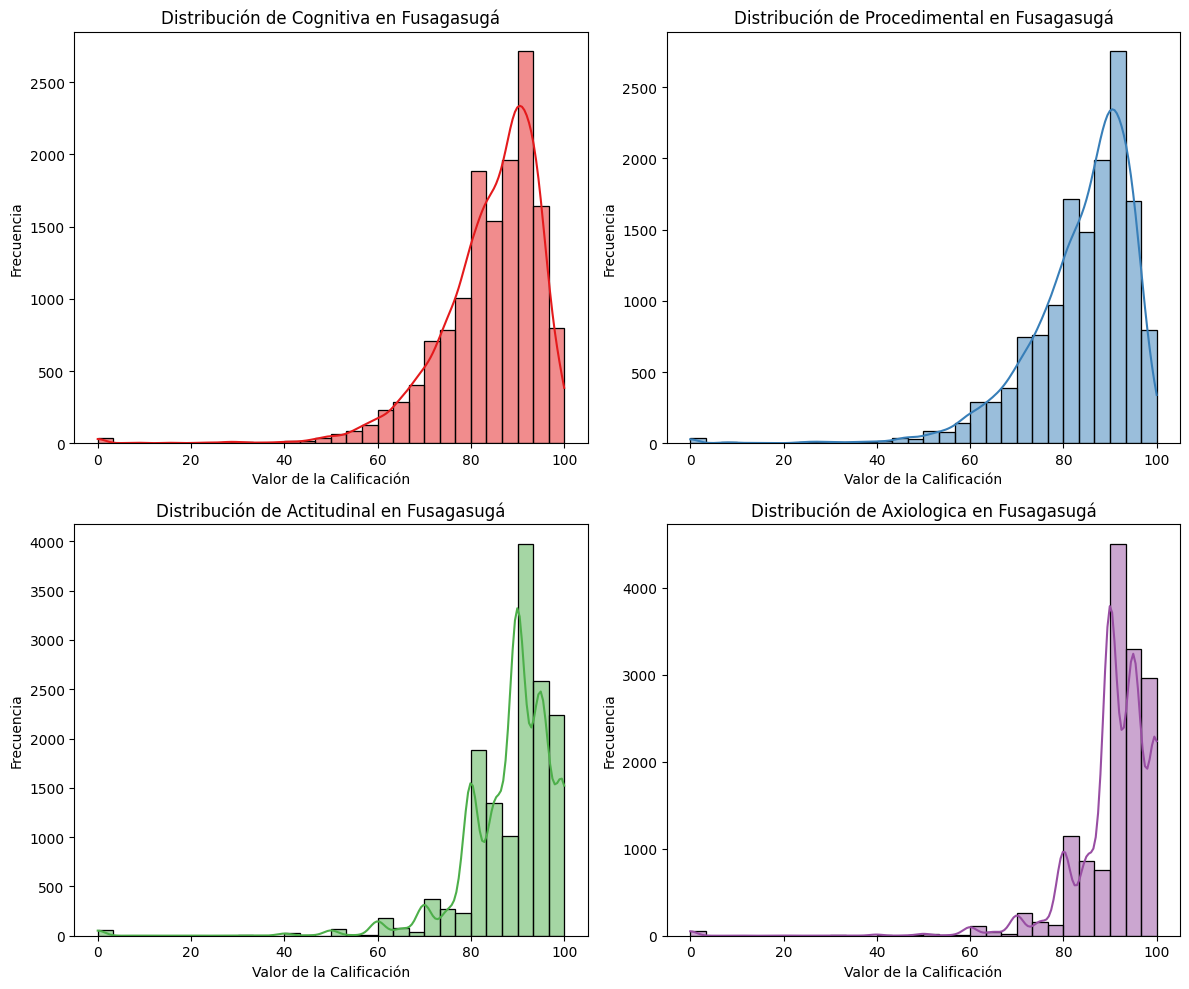

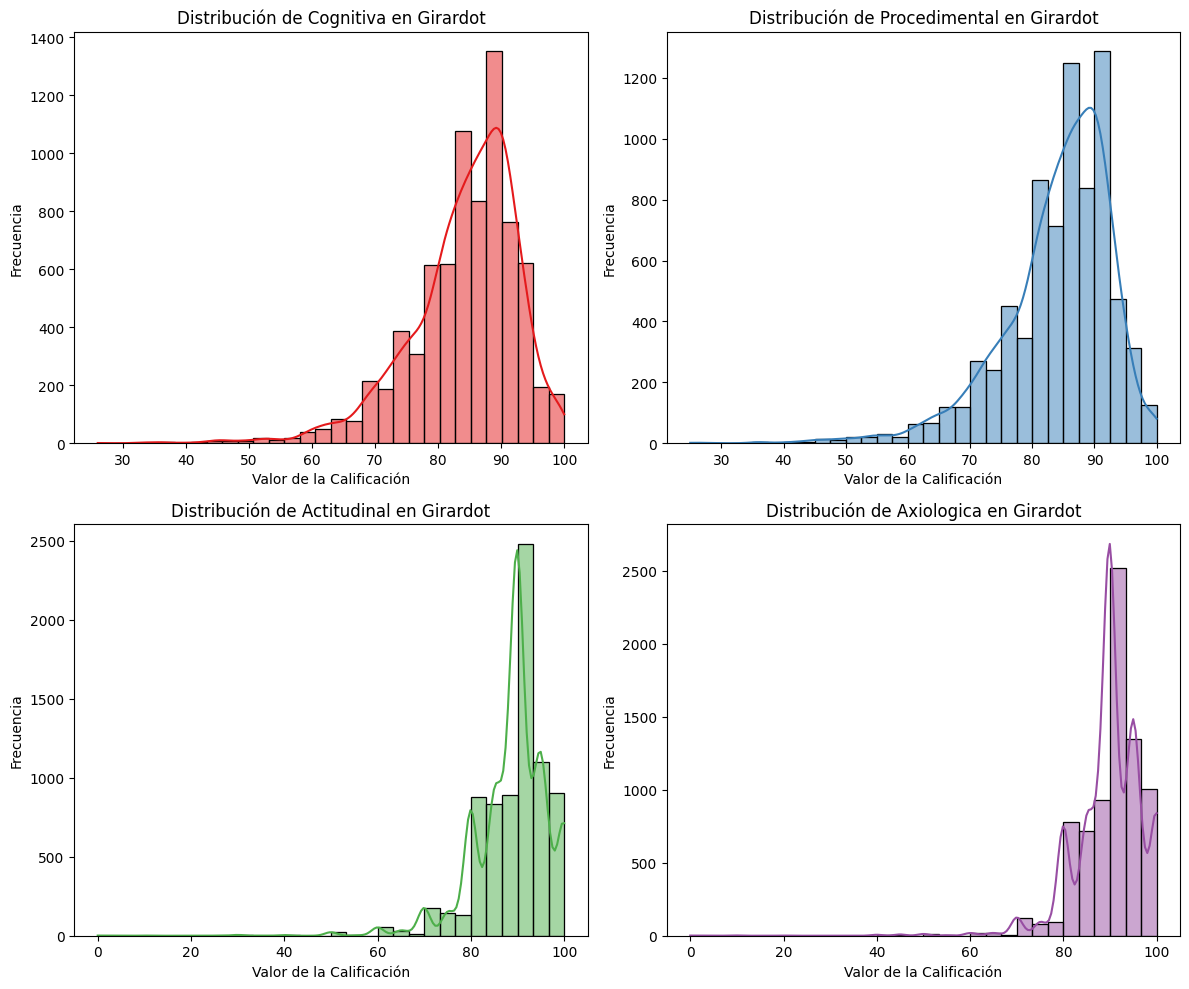

In [140]:
columnas = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica']

fig_fusa, axes_fusa = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes_fusa = axes_fusa.flatten()

paleta = sns.color_palette("Set1", len(columnas))
for i, columna in enumerate(columnas):
    sns.histplot(calificaciones_df_fusa[columna], bins=30, kde=True, ax=axes_fusa[i], color=paleta[i])
    axes_fusa[i].set_title(f'Distribución de {columna} en Fusagasugá')
    axes_fusa[i].set_xlabel('Valor de la Calificación')
    axes_fusa[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

fig_girardot, axes_girardot = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes_girardot = axes_girardot.flatten()
for i, columna in enumerate(columnas):
    sns.histplot(calificaciones_df_girardot[columna], bins=30, kde=True, ax=axes_girardot[i], color=paleta[i])
    axes_girardot[i].set_title(f'Distribución de {columna} en Girardot')
    axes_girardot[i].set_xlabel('Valor de la Calificación')
    axes_girardot[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()



- Generacion grafico boxplot para entendimiento inicial de los datos atipicos

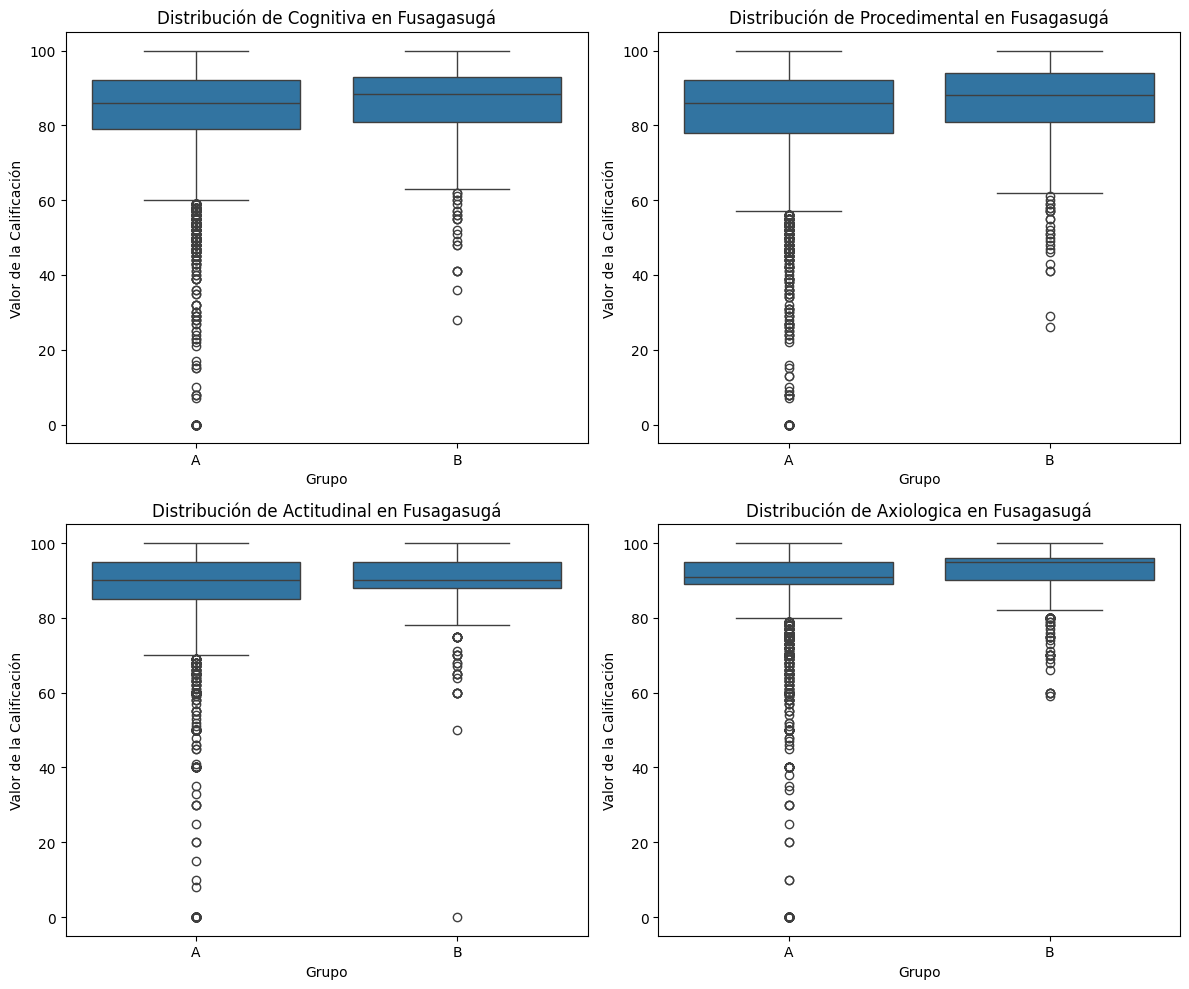

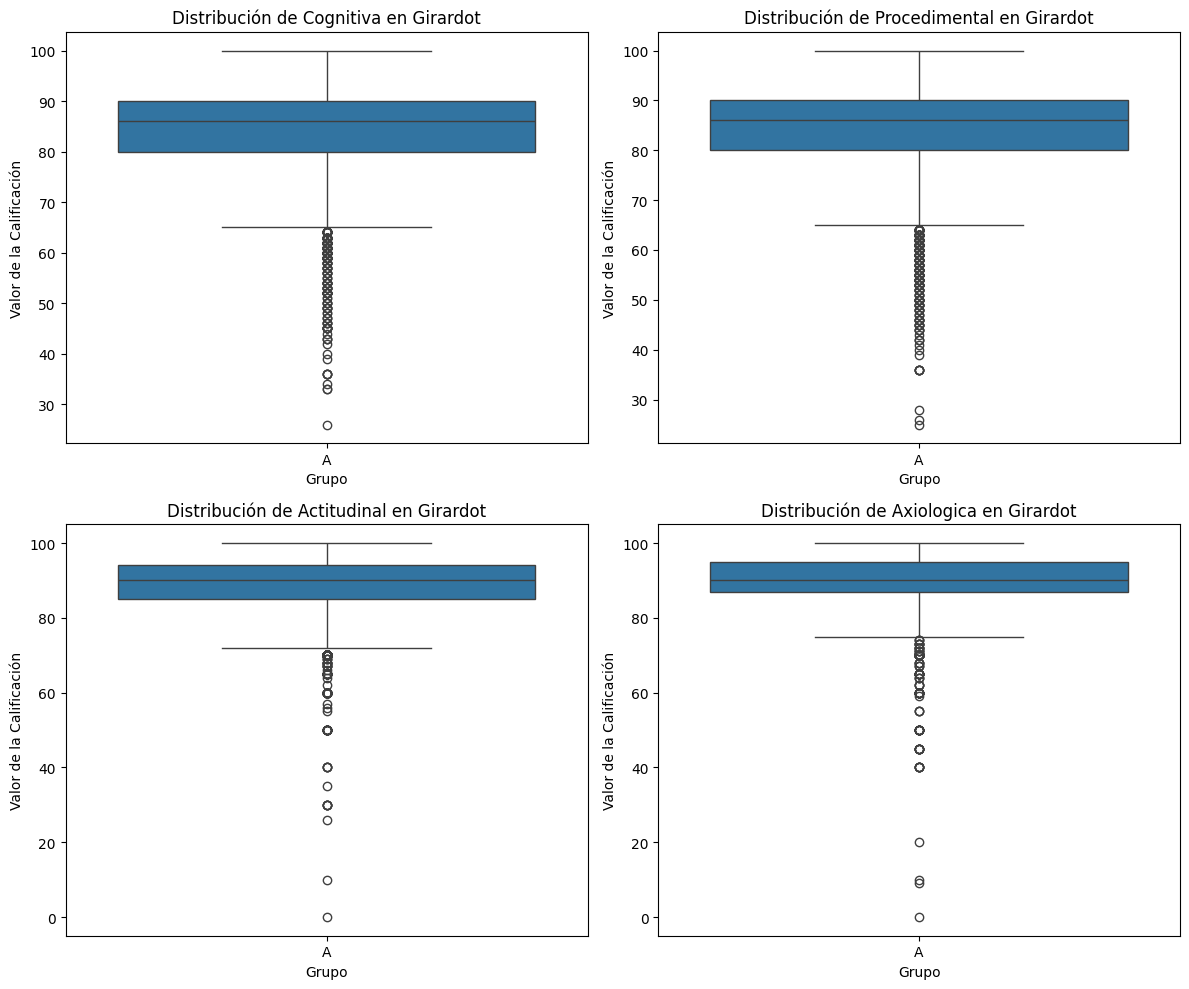

In [143]:
columnas = ['Cognitiva', 'Procedimental', 'Actitudinal', 'Axiologica']

fig_fusa, axes_fusa = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes_fusa = axes_fusa.flatten()

for i, columna in enumerate(columnas):
    sns.boxplot(data=calificaciones_df_fusa, x='Grupo', y=columna, ax=axes_fusa[i])
    axes_fusa[i].set_title(f'Distribución de {columna} en Fusagasugá')
    axes_fusa[i].set_xlabel('Grupo')
    axes_fusa[i].set_ylabel('Valor de la Calificación')
plt.tight_layout()
plt.show()

# Configurar la cuadrícula de subplots 2x2 para el segundo DataFrame (Girardot)
fig_girardot, axes_girardot = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes_girardot = axes_girardot.flatten()

for i, columna in enumerate(columnas):
    sns.boxplot(data=calificaciones_df_girardot, x='Grupo', y=columna, ax=axes_girardot[i])
    axes_girardot[i].set_title(f'Distribución de {columna} en Girardot')
    axes_girardot[i].set_xlabel('Grupo')
    axes_girardot[i].set_ylabel('Valor de la Calificación')
plt.tight_layout()
plt.show()

- Distribuciones por sede

C:\Users\Cathe\AppData\Local\Temp\ipykernel_26416\724158279.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sede', data=calificaciones_df_trans, palette=palette)
C:\Users\Cathe\AppData\Local\Temp\ipykernel_26416\724158279.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x='Sede', data=calificaciones_df_trans, palette=palette)


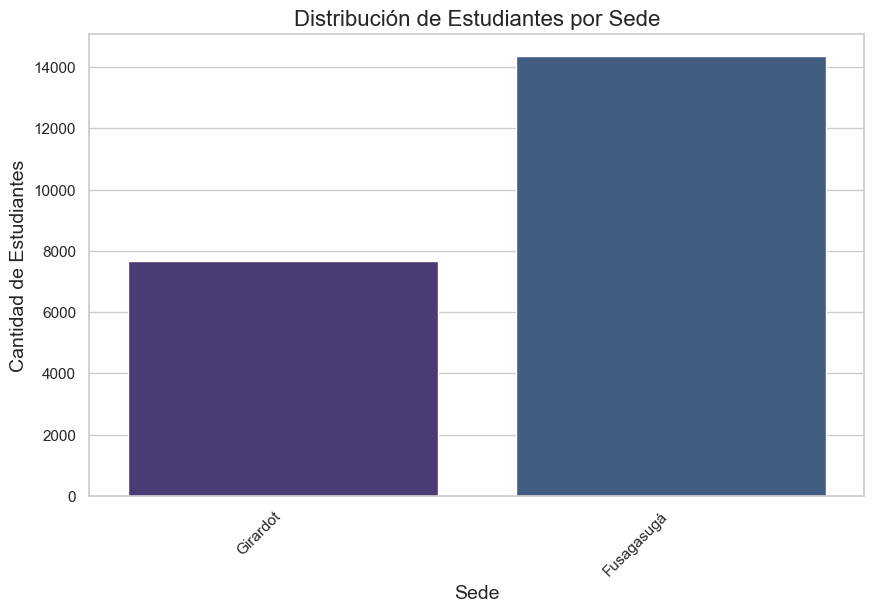

In [144]:

# Configuración de estilo y paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("viridis")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Sede', data=calificaciones_df_trans, palette=palette)

plt.title('Distribución de Estudiantes por Sede', fontsize=16)
plt.xlabel('Sede', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right')

plt.show()


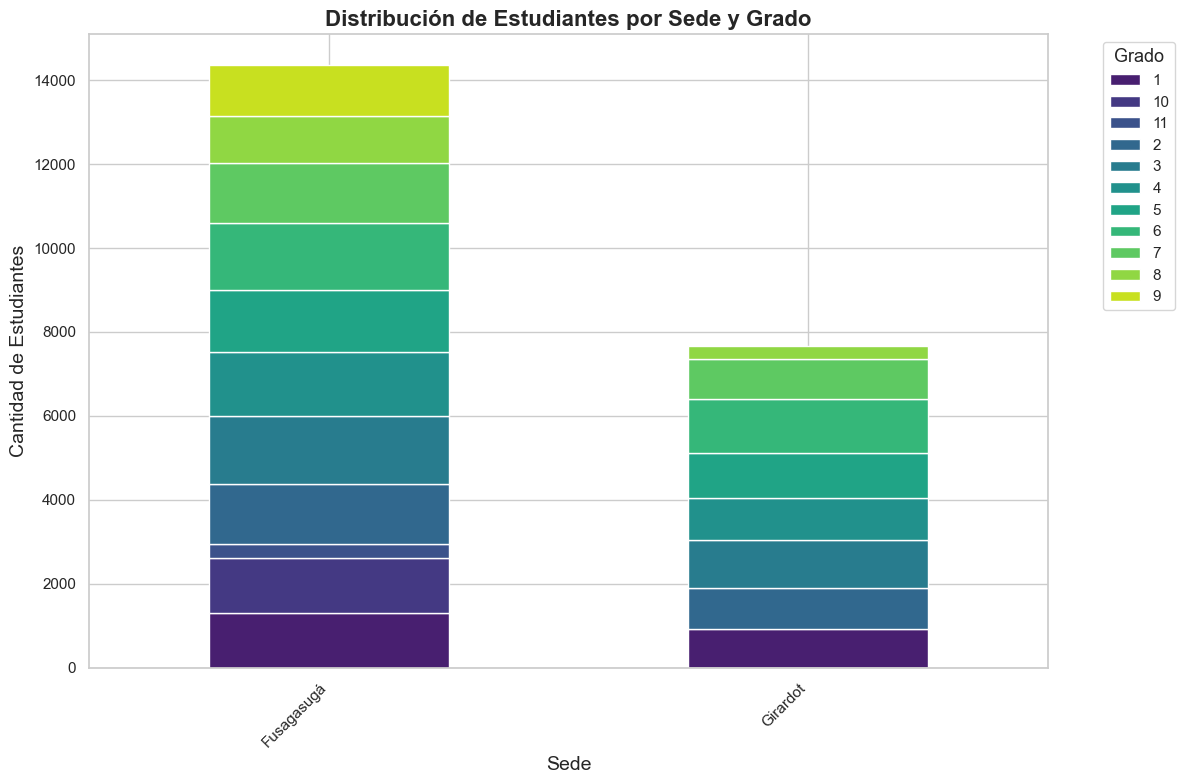

In [147]:

# Contar la cantidad de estudiantes por sede y grado
crosstab = pd.crosstab(calificaciones_df_trans['Sede'], calificaciones_df_trans['Grado'])

# Configuración de estilo y paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(crosstab.columns))

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Plotear el gráfico con matplotlib
crosstab.plot(kind='bar', stacked=True, ax=ax, color=palette)

# Personalización del gráfico
plt.title('Distribución de Estudiantes por Sede y Grado', fontsize=16, weight='bold')
plt.xlabel('Sede', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.legend(title='Grado', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el espacio para la leyenda
plt.tight_layout()

plt.show()
